# Introduction to Order Distribution Generator

This example Python notebook showcases the usage of the `OrderDistributionGenerator` module. This module helps generate synthetic orders based on assumed distributions and factors. Each order is distributed across periods with calculated probabilities. These probabilities are then used to generate a DataFrame of orders with given products.

In this notebook, we will:
1. Define the parameters for generating orders.
2. Use the `OrderDistributionGenerator` to create synthetic orders.
3. Visualize the cumulative orders over time.
4. Generate a DataFrame of orders with product details.

The package uses primarly polars, pydantic, numpy packages

In [1]:
from order_generator import OrderDistributionGenerator
import polars as pl
from datetime import datetime

The arguments to generate `OrderDistributionGenerator`:
- `start_date`: start date of the period,
- `end_date`: end date of the period,
- `total_orders`: number of orders to distribute in period,
- `month_probabilities`: list of probabilites for each month (needed for Monthly, Daily, Hourly Distributions),
- `day_of_week_factor`: list of multipliers for each day of week (Optional)
- `day_of_month_factor`: list of multipliers for each day of month (Optional),
- `hour_probabilities`: list of probabilites for each hour (needed for Hourly Distribution), ,
- `noise_std_dev`: standard deviation for the noising

In [7]:
start_date = datetime(2025, 1, 1)
end_date = datetime(2026, 12, 31)
total_orders = 10000

# list of probabilities for each month, index 0 is January, index 11 is December (default = [1.0 / 12] * 12)
month_probabilities = [0.05, 0.05, 0.05, 0.05, 0.05, 0.10, 0.10, 0.20, 0.15, 0.05, 0.05, 0.10]

# list of multipliers for days of week, index 0 is Monday, index 6 is Sunday (default = [1.0] * 7)
day_of_week_factor = [1, 1, 1, 1, 1, 1.5, 1.5] 

# list of multipliers for days of month (default = [1.0] * 31)
day_of_month_factor = [1.0] * 31

# list of probabilities for each hour, index 0 is 00:00, index 23 is 23:00 (default = [1.0 / 24] * 24)
hour_probabilities = [0, 0, 0, 0, 0, 0, 0, 0, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.1, 0.1, 0.1, 0.1, 0.15, 0.15, 0, 0, 0, 0]

# standard deviation used to Noise the distributions
noise_std_dev = 0.0

#linear trend
linear_trend = 0.7

Using `OrderDistributionGenerator` we can create an order distribution object

In [8]:
orders = OrderDistributionGenerator(
    start_date=start_date,
    end_date=end_date,
    total_orders=total_orders,
    month_probabilities=month_probabilities,
    day_of_week_factor=day_of_week_factor,
    day_of_month_factor=day_of_month_factor,
    hour_probabilities=hour_probabilities,
    linear_trend=linear_trend,
    noise_std_dev=noise_std_dev
)

This object has three methods:
1. print_orders_cumulated(distribution_type)
prints the number of orders in each specified distribution_type

In [9]:
orders.print_orders_cumulated('day')


Year: 2025, Month: 1, Day of Week: 2, Day of Month: 1, Year Probability: 0.50, Month Probability: 0.05, Day Probability: 0.01, Orders 4.0
Year: 2025, Month: 1, Day of Week: 3, Day of Month: 2, Year Probability: 0.50, Month Probability: 0.05, Day Probability: 0.01, Orders 4.0
Year: 2025, Month: 1, Day of Week: 4, Day of Month: 3, Year Probability: 0.50, Month Probability: 0.05, Day Probability: 0.01, Orders 4.0
Year: 2025, Month: 1, Day of Week: 5, Day of Month: 4, Year Probability: 0.50, Month Probability: 0.05, Day Probability: 0.02, Orders 6.0
Year: 2025, Month: 1, Day of Week: 6, Day of Month: 5, Year Probability: 0.50, Month Probability: 0.05, Day Probability: 0.02, Orders 6.0
Year: 2025, Month: 1, Day of Week: 0, Day of Month: 6, Year Probability: 0.50, Month Probability: 0.05, Day Probability: 0.01, Orders 4.0
Year: 2025, Month: 1, Day of Week: 1, Day of Month: 7, Year Probability: 0.50, Month Probability: 0.05, Day Probability: 0.01, Orders 4.0
Year: 2025, Month: 1, Day of Week:

2. plot_orders_cumulated(distribution_type) plots the number of orders in specified distribution_type

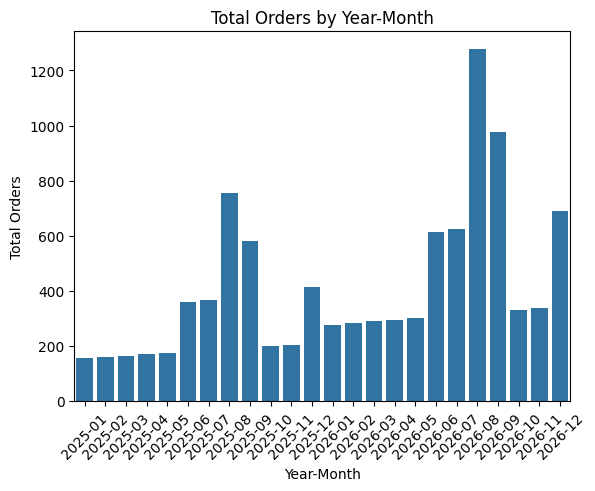

In [10]:
orders.plot_orders_cumulated('month')


3. create_orders_df(
    - distribution_type: str (year, month, day, hour), 
    - item_data: pl.DataFrame (pl.DataFrame with item_name_col),
    - item_name_col: str (column with item names), 
    - item_price_col: str (column with item prices) - Optional, 
    - item_popularity_col: str (column representing item popularity eg. number of reviews, number of previous orders) - Optional,
    - allow_order_multiple: bool (allow one order_id to have multiple items ordered) - Optional,
    - order_multiple_probability: float (p argument in geometric distribution) - Optional
                        )


In [ ]:
orders.create_orders_df(distribution_type="day", 
                        item_data=pl.read_csv("data/items.csv"), 
                        item_name_col="item_name", 
                        item_price_col="item_price", 
                        item_popularity_col="item_reviews_count",
                        allow_order_multiple=True,
                        order_multiple_probability=0.8
                        )

shape: (10_000, 7)
┌──────────┬────────────┬──────┬───────┬──────────────┬───────────────────────────────┬────────────┐
│ order_id ┆ order_date ┆ year ┆ month ┆ day_of_month ┆ item_name                     ┆ item_price │
│ ---      ┆ ---        ┆ ---  ┆ ---   ┆ ---          ┆ ---                           ┆ ---        │
│ i64      ┆ str        ┆ i64  ┆ i64   ┆ i64          ┆ str                           ┆ f64        │
╞══════════╪════════════╪══════╪═══════╪══════════════╪═══════════════════════════════╪════════════╡
│ 1        ┆ 2025-01-01 ┆ 2025 ┆ 1     ┆ 1            ┆ Buty Hoka Arahi 7 M           ┆ 719.99     │
│          ┆            ┆      ┆       ┆              ┆ Biało-Nieb…                   ┆            │
│ 2        ┆ 2025-01-01 ┆ 2025 ┆ 1     ┆ 1            ┆ Buty adidas Terrex Agravic    ┆ 679.99     │
│          ┆            ┆      ┆       ┆              ┆ Spe…                          ┆            │
│ 3        ┆ 2025-01-01 ┆ 2025 ┆ 1     ┆ 1            ┆ Buty Brooks Adre

order_id,order_date,year,month,day_of_month,item_name,item_price
i64,str,i64,i64,i64,str,f64
1,"""2025-01-01""",2025,1,1,"""Buty Hoka Arahi 7 M Biało-Nieb…",719.99
2,"""2025-01-01""",2025,1,1,"""Buty adidas Terrex Agravic Spe…",679.99
3,"""2025-01-01""",2025,1,1,"""Buty Brooks Adrenaline GTS 23 …",699.99
4,"""2025-01-01""",2025,1,1,"""Buty Brooks Ghost 16 M Niebies…",699.99
5,"""2025-01-01""",2025,1,1,"""Buty Nike Air Zoom Alphafly 3 …",1449.99
…,…,…,…,…,…,…
9996,"""2025-12-31""",2025,12,31,"""Buty adidas Terrex Agravic Spe…",679.99
9997,"""2025-12-31""",2025,12,31,"""Buty Nike Air Zoom Structure 2…",569.99
9998,"""2025-12-31""",2025,12,31,"""Buty Hoka Clifton 9 M Błękitno…",629.99
